In [76]:

import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv('C:\\Users\\om sai\\Downloads\\ Project A-20191223\\train.csv')

In [78]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [80]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [81]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
df['Age'].fillna(df.groupby('Sex')['Age'].transform('mean'),inplace=True)

In [83]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [84]:
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [85]:
df.groupby('Sex')['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


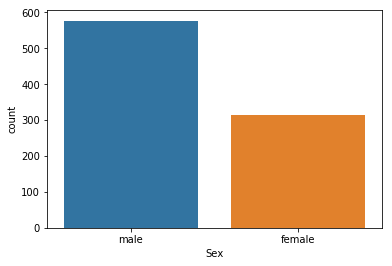

In [86]:
print(sns.countplot(x = 'Sex' , data = df))

AxesSubplot(0.125,0.125;0.775x0.755)


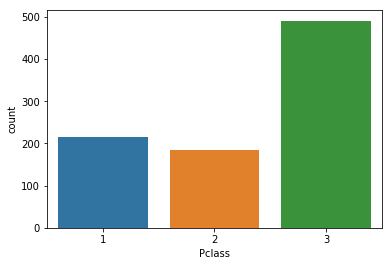

In [87]:
print(sns.countplot(x = 'Pclass' , data = df))

AxesSubplot(0.125,0.125;0.775x0.755)


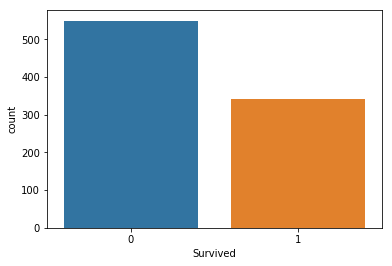

In [88]:
print(sns.countplot(x = 'Survived' , data = df,))

AxesSubplot(0.125,0.125;0.775x0.755)


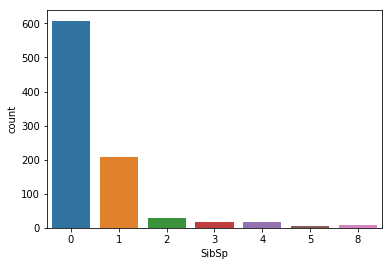

In [89]:
print(sns.countplot(x = 'SibSp' , data = df))

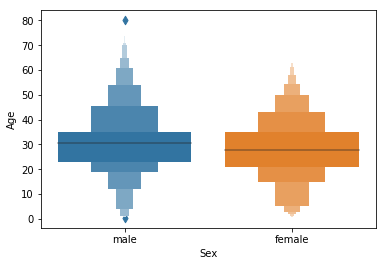

In [90]:
sns.boxenplot(x=df['Sex'],y=df['Age'])

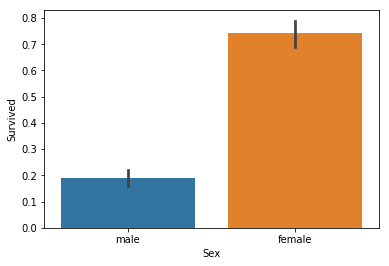

In [91]:
sns.barplot(x=df['Sex'],y=df['Survived'])

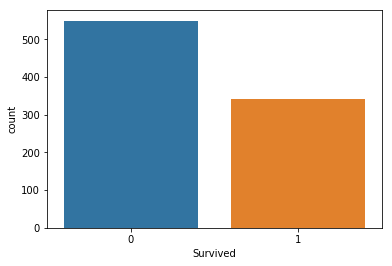

In [92]:
sns.countplot(x=df['Survived'],color=None,)

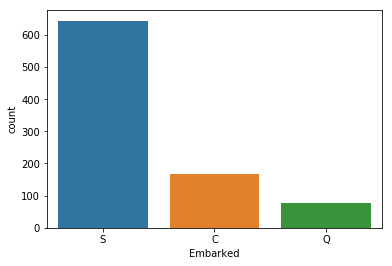

In [93]:
sns.countplot(x=df['Embarked'])

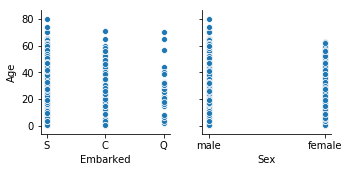

In [94]:
sns.pairplot(df,x_vars=['Embarked','Sex'],y_vars=['Age'],kind= 'scatter')

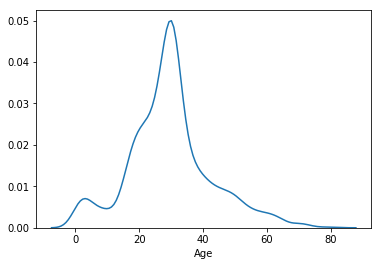

In [95]:
sns.distplot(df['Age'],hist=False)

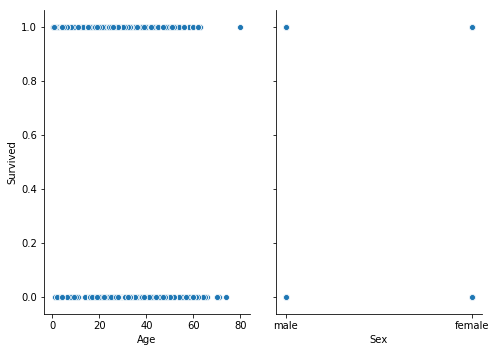

In [96]:
sns.pairplot(df,x_vars=['Age','Sex'],y_vars='Survived',height=5,aspect=0.7)

In [103]:
df.pivot_table(columns=['Embarked'],values='Survived')

Embarked,C,Q,S
Survived,0.553571,0.38961,0.336957


In [98]:
pd.crosstab([df.Pclass,df.Sex],df.Survived)

Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

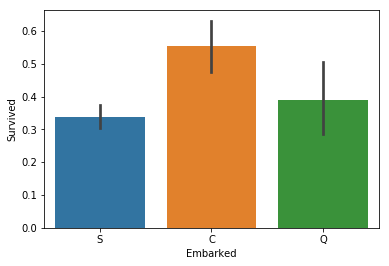

In [100]:
sns.barplot(x=df.Embarked,y=df.Survived)

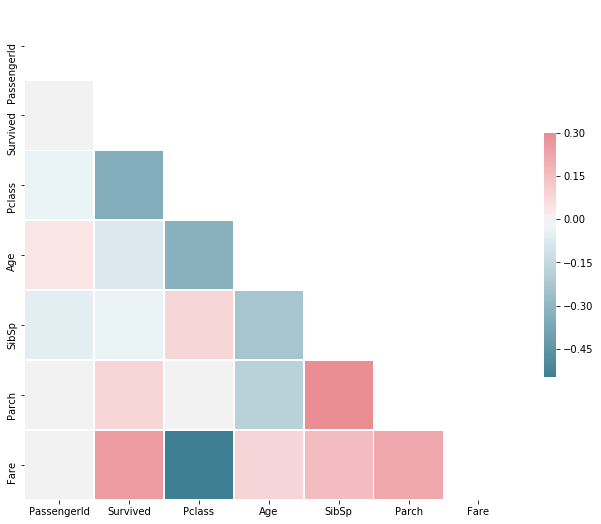

In [25]:
# Let us get the correlation in the data

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

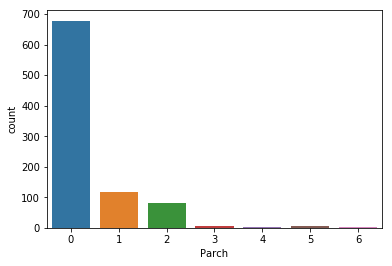

In [26]:
sns.countplot(x=df.Parch)

In [113]:
df[df.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,30.726645,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,30.726645,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,30.726645,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,30.726645,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,30.726645,0,0,112052,0.0,NaN,S


In [108]:
df[Fare]

NameError: name 'Fare' is not defined

In [57]:
death_count=pd.crosstab([df.Embarked],df.Survived.astype(bool))
death_count.plot(kind='bar',stacked=True, color=['red','green'])

AttributeError: 'DataFrame' object has no attribute 'Embarked'

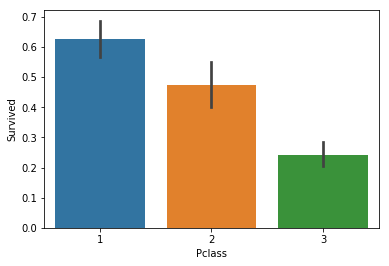

In [58]:
sns.barplot(x=df.Pclass,y=df.Survived)

In [59]:
df.Embarked.value_counts().plot(kind='pie')

AttributeError: 'DataFrame' object has no attribute 'Embarked'

In [114]:
import math

In [60]:
df.Sex.value_counts().plot(kind='pie')

AttributeError: 'DataFrame' object has no attribute 'Sex'

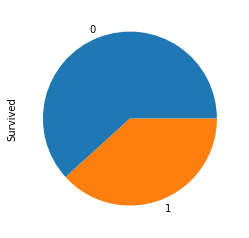

In [61]:
df.Survived.value_counts().plot(kind='pie')

In [62]:
m=pd.crosstab(df.Sex,df.Survived)    

AttributeError: 'DataFrame' object has no attribute 'Sex'

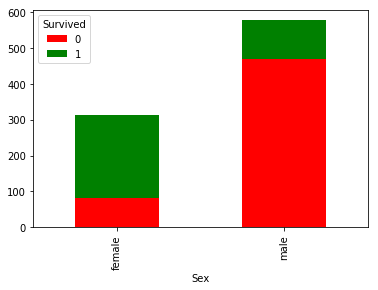

In [63]:
m.plot(kind='bar',stacked=True, color=['r','g'])

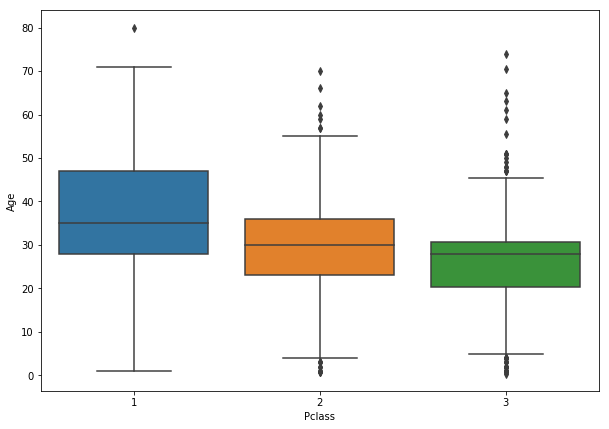

In [64]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=df)

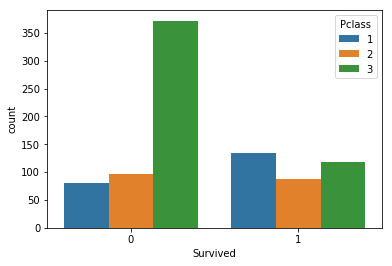

In [65]:
sns.countplot(x='Survived',data=df,hue='Pclass')

In [66]:
df.drop('Cabin',axis=1,inplace=True)

KeyError: "['Cabin'] not found in axis"

In [67]:
df.dropna(inplace=True)

In [68]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

embark = pd.get_dummies(df['Embarked'],drop_first=True)

df = pd.concat([df,sex,embark],axis=1)

KeyError: 'Sex'

In [69]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [70]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


KeyError: "['Sex' 'Embarked' 'Name' 'Ticket'] not found in axis"

In [71]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [72]:
df.drop('PassengerId',axis=1,inplace=True)

KeyError: "['PassengerId'] not found in axis"

In [73]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [74]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
logmodel.score(X_train,y_train)

0.7990353697749196

In [49]:
logmodel.score(X_test,y_test)

0.8052434456928839

In [50]:
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix


print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.80      0.90      0.85       163
           1       0.81      0.65      0.72       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [52]:
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 36,  68]], dtype=int64)